This project creates a unified dataset by merging two widely-used wine quality datasets: red wine and white wine variants from the Portuguese "Vinho Verde" region. The combined dataset provides researchers and data scientists with a comprehensive resource for analyzing chemical determinants of wine quality across different wine types.




**Objective**

To develop an integrated dataset that enables
comparative analysis of physicochemical properties and their relationship with sensory quality ratings for both red and white wines, facilitating more robust machine learning models and deeper insights into wine quality assessment.


**Dataset Composition**


*   Source 1: Red Wine Dataset (1,599 samples)
*   Source 2: White Wine Dataset (4,898 samples)
*   Total Combined: 6,497 wine samples
*   Features: 11 identical physicochemical attributes + 1 wine type identifier
*   Target Variable: Expert quality rating (scale 0-10)


In [1]:
# Pip install pandas matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Step 1: Load dataset
URL_RED   = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
URL_WHITE = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red = pd.read_csv(URL_RED, sep=";")
white = pd.read_csv(URL_WHITE, sep=";")


In [3]:
# Step 2: Sanity checks for dataset structure and compatibility
print("Red shape: ", red.shape, "White shape: ", white.shape)
print("Columns equal? ->", list(red.columns) == list(white.columns))
print("Columns: ", list(red.columns))
print("Missing value - Red: ",red.isnull().sum().sum(), " Missing value - White: ", white.isnull().sum().sum())


Red shape:  (1599, 12) White shape:  (4898, 12)
Columns equal? -> True
Columns:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Missing value - Red:  0  Missing value - White:  0


In [4]:
# (Optional) strict schema assertion (search and read about assert in Python)
assert list(red.columns) == list(white.columns), "Columns mismatch between red and white datasets."


In [5]:
# Step 3: Tag source & merge two datasets (red and white wine) into a single DataFrame
red["type"] = "red"       # Adds column 'type' with value 'red' to red dataset
white["type"] = "white"   # Adds column 'type' with value 'white' to white dataset
df = pd.concat([red, white], ignore_index=True)
print("\nMerged shape: ", df.shape)



Merged shape:  (6497, 13)


In [6]:
# Basic data exploration
print("\nDtypes:\n", df.dtypes)
print("\nMissing value per columns:\n", df.isnull().sum().sort_values(ascending=False))
print("\nHead:\n", df.head())



Dtypes:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

Missing value per columns:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Head:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8

In [7]:
# Uniqueness & duplicates
dup_count = df.duplicated().sum()
print("\nDuplicate rows:", dup_count)

# Descriptive statistics (numeric)
num_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumeric summary:\n", df[num_cols].describe().T)

# Target distributions
print("\nQuality distribution (overall):\n", df['quality'].value_counts().sort_index())
print("\nQuality distribution by type:\n", df.groupby('type')['quality'].value_counts().sort_index())



Duplicate rows: 1177

Numeric summary:
                        count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000 

Top variables: ['alcohol', 'density', 'volatile acidity', 'chlorides']


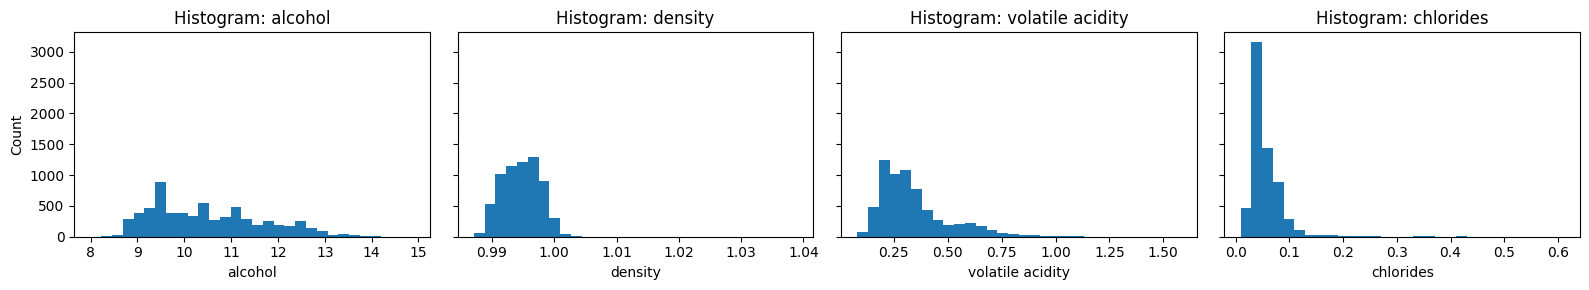

In [8]:
# Step 5:A few simple visuals (optional for report)
# Histograms of numeric features (quick feel for ranges & skew)
numeric_cols = df.select_dtypes(include=[np.number]).columns
top_vars = df[numeric_cols].corr()['quality'].abs().sort_values(ascending=False).index[1:5]  # Exclude quality itself

print("Top variables:", list(top_vars))

n = min(4, len(top_vars))     # Show up to 4 histograms (or fewer if top_vars has less)

fig, axis = plt.subplots(1, 4, figsize=(16, 3), sharey=True)

for i, ax in enumerate(axis):
  if i<n:
    col = top_vars[i]
    ax.hist(df[col].dropna(), bins=30)    # Create histogram (missing line filled)
    ax.set_title(f"Histogram: {col}")
    ax.set_xlabel(col)
    if i == 0:
      ax.set_ylabel("Count")     # Only show y-label on first plot
    else:
      ax.set_ylabel("")
  else:
    ax.axis("off")      # Hide unused panels if top_vars has <4

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

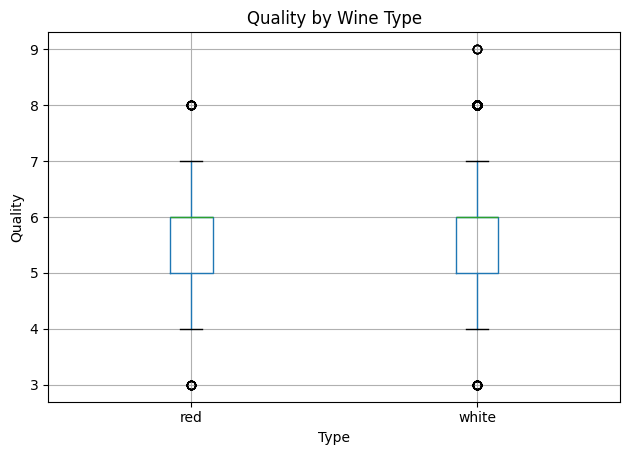

In [9]:
# Boxplot of qquality by type (class distribution spread)
plt.figure()
df.boxplot(column="quality", by="type")
plt.suptitle("")
plt.title("Quality by Wine Type")
plt.xlabel("Type")
plt.ylabel("Quality")
plt.tight_layout()
plt.show()


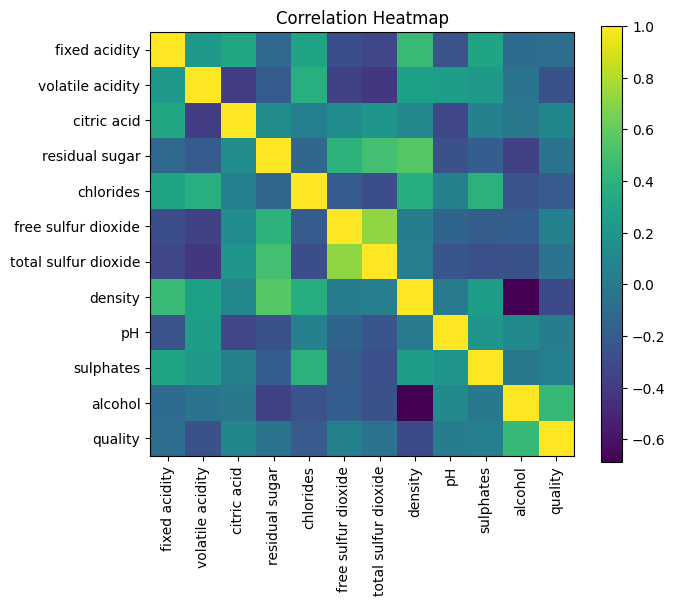

In [10]:
# Correlation heatmap (numeric only)
corr = df[num_cols].corr()
plt.figure(figsize=(7, 6))
plt.imshow(corr, interpolation="nearest")
plt.title("Correlation Heatmap")
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()


In [11]:
# Step 6: Save file
OUT_DIR = Path("./outputs")
OUT_DIR.mkdir(parents=True, exist_ok=True)
out_file = OUT_DIR / "wine_quality_merged.csv"
df.to_csv(out_file, index=False)
print(f"\nSaved merged file to: {out_file.resolve()}")

# Quick verification of saved file
df_check = pd.read_csv(out_file)
print("Reloaded shape: ", df_check.shape)



Saved merged file to: /content/outputs/wine_quality_merged.csv
Reloaded shape:  (6497, 13)
